### KNN实现分类算法

In [8]:
import math

movie_data = {"宝贝当家": [45, 2, 9, "喜剧片"],
              "美人鱼": [21, 17, 5, "喜剧片"],
              "澳门风云3": [54, 9, 11, "喜剧片"],
              "功夫熊猫3": [39, 0, 31, "喜剧片"],
              "谍影重重": [5, 2, 57, "动作片"],
              "叶问3": [3, 2, 65, "动作片"],
              "伦敦陷落": [2, 3, 55, "动作片"],
              "我的特工爷爷": [6, 4, 21, "动作片"],
              "奔爱": [7, 46, 4, "爱情片"],
              "夜孔雀": [9, 39, 8, "爱情片"],
              "代理情人": [9, 38, 2, "爱情片"],
              "新步步惊心": [8, 34, 17, "爱情片"]}

In [19]:
movie_data.items()

dict_items([('宝贝当家', [45, 2, 9, '喜剧片']), ('美人鱼', [21, 17, 5, '喜剧片']), ('澳门风云3', [54, 9, 11, '喜剧片']), ('功夫熊猫3', [39, 0, 31, '喜剧片']), ('谍影重重', [5, 2, 57, '动作片']), ('叶问3', [3, 2, 65, '动作片']), ('伦敦陷落', [2, 3, 55, '动作片']), ('我的特工爷爷', [6, 4, 21, '动作片']), ('奔爱', [7, 46, 4, '爱情片']), ('夜孔雀', [9, 39, 8, '爱情片']), ('代理情人', [9, 38, 2, '爱情片']), ('新步步惊心', [8, 34, 17, '爱情片'])])

In [9]:
# 测试样本  唐人街探案": [23, 3, 17, "？片"]
#下面为求与数据集中所有数据的距离代码：
x = [23, 3, 17]
KNN = []
for key, v in movie_data.items():
    d = math.sqrt((x[0] - v[0]) ** 2 + (x[1] - v[1]) ** 2 + (x[2] - v[2]) ** 2)
    KNN.append([key, round(d, 2)])

# 输出所用电影到 唐人街探案的距离
print(KNN)

[['宝贝当家', 23.43], ['美人鱼', 18.55], ['澳门风云3', 32.14], ['功夫熊猫3', 21.47], ['谍影重重', 43.87], ['叶问3', 52.01], ['伦敦陷落', 43.42], ['我的特工爷爷', 17.49], ['奔爱', 47.69], ['夜孔雀', 39.66], ['代理情人', 40.57], ['新步步惊心', 34.44]]


In [10]:
#按照距离大小进行递增排序
KNN.sort(key=lambda dis: dis[1])

#选取距离最小的k个样本，这里取k=5；
KNN=KNN[:5]
KNN

[['我的特工爷爷', 17.49],
 ['美人鱼', 18.55],
 ['功夫熊猫3', 21.47],
 ['宝贝当家', 23.43],
 ['澳门风云3', 32.14]]

In [17]:
# 计算距离最小的N个样本所属类型分类统计
labels = {"动作片":0,"爱情片":0,"喜剧片":0,}
for s in KNN:
    label = movie_data[s[0]]
    labels[label[3]] += 1
labels

{'动作片': 1, '爱情片': 0, '喜剧片': 4}

In [18]:
#按照出现频率次数从高到低排序
labels =sorted(labels.items(),key=lambda l: l[1],reverse=True)
print(labels,labels[0][0],sep='\n')

[('喜剧片', 4), ('动作片', 1), ('爱情片', 0)]
喜剧片


### KNN 实现回归算法

In [155]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#预测房屋价格
#读取数据
df = pd.read_csv('room.csv', nrows = 500)
df.head()  # data frame

,price_id,community_id,trans_date,street,road,shift_floor,room,bath_room,building_area,attach_area,month,trans_month,price
0,4120148,14292,8/1/2020,1,0,13,3,2,22.5847,3.0159,1,A,169097.1482
1,4138158,14292,7/2/2020,1,0,9,3,2,25.4040,2.8828,1,A,119392.3761
2,4146677,14292,16/1/2020,1,0,7,3,2,22.4153,3.0159,1,A,130319.8421
3,4147149,14292,8/2/2020,0,1,8,4,2,26.8953,1.0134,1,A,126755.5646
4,4157790,14292,1/3/2020,0,1,7,2,1,18.2347,2.6529,1,A,133021.6825


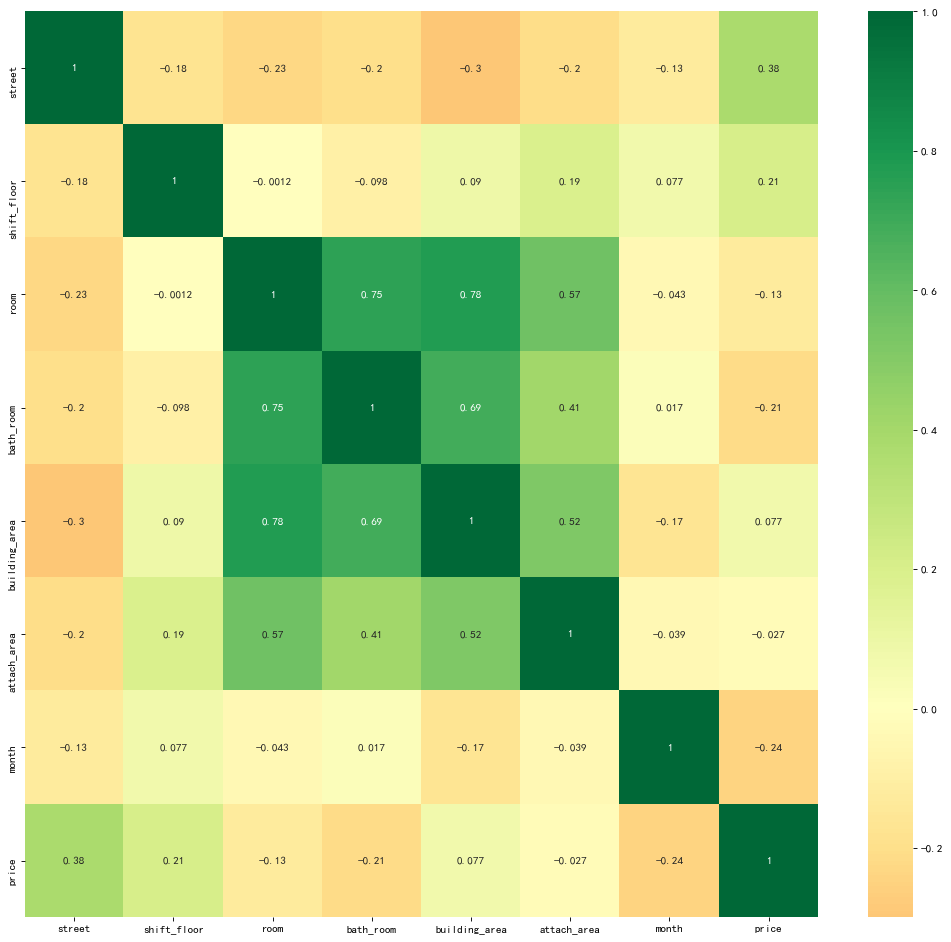

In [156]:
def heatmap(data, method='pearson', camp='RdYlGn', figsize=(10 ,8)):
    """
    data: 整份数据
    method：默认为 pearson 系数
    camp：默认为：RdYlGn-红黄蓝；YlGnBu-黄绿蓝；
    figsize: 默认为 10，8
    Seaborn是基于matplotlib的图形可视化python包
    """
    plt.figure(figsize=figsize, dpi= 80)
    sns.heatmap(data.corr(method=method), \
                xticklabels=data.corr(method=method).columns, \
                yticklabels=data.corr(method=method).columns, cmap=camp, \
                center=0, annot=True)
    plt.show()
    # 要想实现只是留下对角线一半的效果，括号内的参数可以加上 mask=mask
# heatmap(data=df[['street', 'land_zoning_use', 'subway', 'age', 'month', 'room', 'building_area', 'attach_area', 'trans_month', 'floor', 'price']], figsize=(16,15))
heatmap(data=df[['trans_date', 'street', 'shift_floor', 'room', 'bath_room', 'building_area', 'attach_area', 'month', 'price']], figsize=(16,15))

In [157]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

# 选取特诊因子，形成新的集合，对应的价格也形成以为数组
# print(df.isnull().any()) 查看是否为空值
df.fillna(0, inplace=True)

X = df[['shift_floor', 'room', 'bath_room', 'building_area', 'attach_area', 'month']]
y = df['price'].values.reshape(-1, 1)

#random_state就像随机生成器中的seed。通过不同的值采样的训练数据和测试数据是不一样的。设定一个固定的random_state有助于诊断程序本身，因为每次所期待的结果都会一样
#取70%作为训练集，30%作为验证集合
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)
X_test

,shift_floor,room,bath_room,building_area,attach_area,month
196,7,2,1,24.4239,3.2156,3
280,12,2,1,17.2334,2.2385,3
388,6,3,1,16.9793,5.3331,4
379,10,3,2,20.6547,5.9593,3
335,13,2,1,15.6967,3.7329,1
275,20,2,1,15.2884,2.2385,3
244,26,4,2,29.4484,5.8867,1
438,21,2,1,19.8440,2.3020,1
239,16,2,1,17.2334,2.2385,1
493,5,2,1,19.0666,3.5453,2


In [158]:
#去均值和方差归一化
X_normalizer = StandardScaler() # N(0,1)
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)
y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)

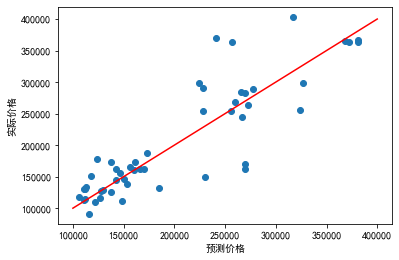

In [159]:
knn = KNeighborsRegressor(n_neighbors=2) #K=2
knn.fit(X_train, y_train.ravel())
# 预测房价:
y_pred = knn.predict(X_test)
y_pred

y_pred_inv = y_normalizer.inverse_transform(y_pred)
y_test_inv = y_normalizer.inverse_transform(y_test)

# 创建点阵图
plt.scatter(y_pred_inv, y_test_inv)
plt.xlabel('预测值')
plt.ylabel('实际值')

# 现在来增加预测线
# linspace(x1,x2,N)。linspace是Matlab中的均分计算指令，用于产生x1,x2之间的N点行线性的矢量。其中x1、x2、N分别为起始值、终止值、元素个数。若默认N，默认点数为100
diagonal = np.linspace(100000, 400000, 10000)

plt.plot(diagonal, diagonal, '-r')
plt.xlabel('预测价格')
plt.ylabel('实际价格')
plt.show()

# print(y_pred_inv)
# print(y_test_inv)